In [2]:
import pandas as pd

# Predict if there will be rain or not using Decision Tree Classifier

### Data Preparation

In [3]:
dt=pd.read_csv('data/Rainfall_data.csv')
dt

,Index,Temperature,Humidity%,Rain
0,0,34,74.2,Yes
1,1,19,68.2,No
2,2,28,67.2,Yes
3,3,29,66.6,Yes
4,4,26,57.9,Yes
...,...,...,...,...
19995,19995,30,77.9,Yes
19996,19996,20,74.8,Yes
19997,19997,14,69.4,No
19998,19998,20,60.6,No


In [4]:
from sklearn.model_selection import train_test_split
X= dt.drop(columns=['Index','Rain'])
Y=dt['Rain']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.05)

### Builing a Model 

In [5]:
from sklearn.tree import DecisionTreeClassifier
Model= DecisionTreeClassifier()
Model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [9]:
Model.predict([[33,70],
               [20,55]])

/Users/jigishap/.pyenv/versions/MachineLearning/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Yes', 'No'], dtype=object)

In [10]:
pred_y=Model.predict(X_test)

In [12]:
cmp=pd.DataFrame({'Predicted Values':pred_y.flatten(),
                  'Actual Values':Y_test.values})
#cmp.plot.bar(figsize=(10,10))

In [13]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
en.fit(['Yes','No'])

LabelEncoder()

In [14]:
cmp['Actual Values']=en.transform(cmp['Actual Values'])
cmp['Predicted Values']=en.transform(cmp['Predicted Values'])

<AxesSubplot: ylabel='Density'>

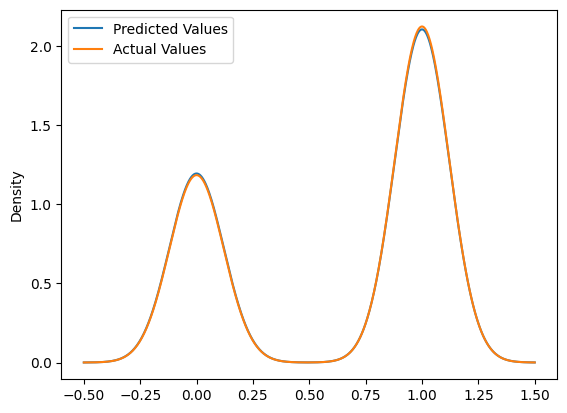

In [16]:
cmp.plot(kind='density')

In [17]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(Y_test,pred_y)*100
print(acc)

90.4
